In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet as proph

In [16]:
def prophet_graph(df):
    df = df.rename(columns={'Date': 'ds',
                        'Value': 'y'})
    Model = proph(interval_width=0.95)
    Model.fit(df)
    future_dates = Model.make_future_dataframe(periods=12, freq='MS')
    forecast = Model.predict(future_dates)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    Model.plot(forecast, uncertainty=True)
    return plt.show()

In [17]:
new_df = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv', encoding = 'unicode_escape')
new_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1050700,1049700,1050800,1055800,1061200,1070000,1083000,1086000,1072000,1056500
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,336700,335900,336000,335600,334200,333400,333500,333500,331800,330100
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1319300,1320800,1325400,1331900,1338800,1345000,1351100,1349700,1337100,1323500
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,179300,180200,181000,182100,183400,183100,182000,181800,183300,184300
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,126400,126900,127600,128200,128600,128900,128700,128500,129000,129800


In [15]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [18]:
def melt_data(df):
    mdf = pd.melt(df, id_vars=['RegionName', 'City', 'Metro', 'State', 'CountyName', 'SizeRank'], 
                 value_vars = df.loc[:, '2012-01':'2019-07'], value_name = 'Value', var_name = 'Date')
    mdf_cleaned = mdf.dropna(subset=['Value', 'Metro'])
    return mdf_cleaned

In [19]:
df = melt_data(new_df)
df.head()

,RegionName,City,Metro,State,CountyName,SizeRank,Date,Value
0,60657,Chicago,Chicago-Naperville-Elgin,IL,Cook County,1,2012-01,739600.0
1,77494,Katy,Houston-The Woodlands-Sugar Land,TX,Harris County,2,2012-01,248800.0
2,60614,Chicago,Chicago-Naperville-Elgin,IL,Cook County,3,2012-01,931300.0
3,77449,Katy,Houston-The Woodlands-Sugar Land,TX,Harris County,4,2012-01,116000.0
4,79936,El Paso,El Paso,TX,El Paso County,5,2012-01,112400.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290042 entries, 0 to 1433431
Data columns (total 8 columns):
RegionName    1290042 non-null int64
City          1290042 non-null object
Metro         1290042 non-null object
State         1290042 non-null object
CountyName    1290042 non-null object
SizeRank      1290042 non-null int64
Date          1290042 non-null object
Value         1290042 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 88.6+ MB


In [19]:
df.isna().sum()

RegionName    0
City          0
Metro         0
State         0
CountyName    0
SizeRank      0
Date          0
Value         0
dtype: int64

In [20]:
df.Date = pd.to_datetime(df.Date)

In [21]:
df_sr = df.SizeRank.quantile(q=0.01)
df_topone = df.loc[df['SizeRank']< df_sr]

In [22]:
df_topone.shape

(12880, 8)

## Prophet

In [97]:
def subset_zipcode(zipcode, df):
    df_12 = df.copy()
    df_12 = df_12[df_12['RegionName'] == zipcode]
    df_12.drop(columns=['RegionName'], inplace=True)
    df_12.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)
    return df_12

In [98]:
Model = proph(interval_width=0.95) 
date_value_df = subset_zipcode(zipcode, df_topone)
Model.fit(date_value_df)
future_dates = Model.make_future_dataframe(periods=12, freq='MS')
forecast = Model.predict(future_dates).tail(12)

NameError: name 'zipcode' is not defined

In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67,2019-08-01,455839.410215,440667.769138,465228.940558,455702.695527,455973.266932,-2898.960468,-2898.960468,-2898.960468,-2898.960468,-2898.960468,-2898.960468,0.0,0.0,0.0,452940.449747
68,2019-09-01,459919.898783,442695.076714,468421.496565,459493.072451,460314.069984,-4359.935533,-4359.935533,-4359.935533,-4359.935533,-4359.935533,-4359.935533,0.0,0.0,0.0,455559.963250
69,2019-10-01,463868.758688,446929.529963,472906.884068,462994.137288,464610.737961,-3581.522776,-3581.522776,-3581.522776,-3581.522776,-3581.522776,-3581.522776,0.0,0.0,0.0,460287.235913
70,2019-11-01,467949.247257,454197.010118,480568.370018,466583.039149,469056.586355,-863.121303,-863.121303,-863.121303,-863.121303,-863.121303,-863.121303,0.0,0.0,0.0,467086.125954
71,2019-12-01,471898.107162,461799.675990,487303.679672,470119.058590,473418.487067,2320.911025,2320.911025,2320.911025,2320.911025,2320.911025,2320.911025,0.0,0.0,0.0,474219.018187
72,2020-01-01,475978.595730,467797.776672,492629.177529,473642.453056,477929.195822,4209.176419,4209.176419,4209.176419,4209.176419,4209.176419,4209.176419,0.0,0.0,0.0,480187.772149
73,2020-02-01,480059.084299,469883.156699,496920.941360,477140.039612,482489.548236,3638.515154,3638.515154,3638.515154,3638.515154,3638.515154,3638.515154,0.0,0.0,0.0,483697.599453
74,2020-03-01,483876.315541,474094.634545,500885.341130,480446.747976,486756.727975,3753.038699,3753.038699,3753.038699,3753.038699,3753.038699,3753.038699,0.0,0.0,0.0,487629.354240
75,2020-04-01,487956.804109,478744.532462,504574.616196,483964.746917,491328.297669,3960.269918,3960.269918,3960.269918,3960.269918,3960.269918,3960.269918,0.0,0.0,0.0,491917.074027
76,2020-05-01,491905.664014,480638.501526,507374.239134,487360.508842,495892.841589,2142.640663,2142.640663,2142.640663,2142.640663,2142.640663,2142.640663,0.0,0.0,0.0,494048.304677


In [40]:
def prophet_m(zipcode, df):   
    Model = proph(interval_width=0.95) 
    date_value_df = subset_zipcode(zipcode, df)
    Model.fit(date_value_df)
    future_dates = Model.make_future_dataframe(periods=12, freq='MS')
    forecast = Model.predict(future_dates).tail(12)
    
    
    ds = forecast['ds'].iloc[0]
    y_hat = forecast['yhat'].values[0]
    y_hat_lower = forecast['yhat_lower'].values[0]
    y_hat_upper = forecast['yhat_upper'].values[0]
    current_price = date_value_df['y'].iloc[-1]

    return (ds, y_hat, y_hat_lower, y_hat_upper, current_price)

In [41]:
zipcodes = df_topone['RegionName'].unique()
# zipcodes = [60657, 75070]
predictions = []
for zipcode in zipcodes:
    ds, y_hat, y_hat_lower, y_hat_upper, current_price = prophet_m(zipcode, df_topone) #(current $, predicted $, upper, lower)
    predictions.append({'zip': zipcode,
                        'ds': ds,
                        'y_hat': y_hat,
                        'y_hat_lower': y_hat_lower,
                        'y_hat_upper': y_hat_upper,
                        'current_price': current_price})


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [42]:
pred_df = pd.DataFrame(predictions)

In [43]:
pred_df['diff'] = pred_df['y_hat'] - pred_df['current_price'] 

In [44]:
pred_df.sort_values(by='diff', ascending=False)

,current_price,ds,y_hat,y_hat_lower,y_hat_upper,zip,diff
83,3031000.0,2019-08-01,3.379698e+06,3.262882e+06,3.497639e+06,33139,348697.971025
9,3760500.0,2019-08-01,4.014548e+06,3.912970e+06,4.108201e+06,94109,254048.299445
24,6906400.0,2019-08-01,7.100881e+06,6.253292e+06,8.060487e+06,10128,194481.481213
79,1523800.0,2019-08-01,1.664609e+06,1.593588e+06,1.731272e+06,94110,140809.376222
99,1435100.0,2019-08-01,1.550155e+06,1.468095e+06,1.635725e+06,11211,115054.571453
49,1224100.0,2019-08-01,1.330729e+06,1.281545e+06,1.379357e+06,11230,106629.429118
23,9409000.0,2019-08-01,9.510136e+06,9.195908e+06,9.819696e+06,10011,101135.558215
57,1032400.0,2019-08-01,1.121218e+06,1.083944e+06,1.156396e+06,11221,88818.003397
82,1361600.0,2019-08-01,1.433928e+06,1.403754e+06,1.461410e+06,90034,72328.187557
32,1841900.0,2019-08-01,1.881785e+06,1.859023e+06,1.902485e+06,90046,39885.476333


In [45]:
pred_df.to_csv('prediction_home.csv')

In [2]:
!ls

LICENSE                            prediction_home_2020_7.csv
README.md                          prophet_model.ipynb
Zip_Zhvi_SingleFamilyResidence.csv text.py
prediction_home.csv


In [3]:
prediction_df = pd.read_csv('prediction_home_2020_7.csv')

In [4]:
prediction_df.head()

,Unnamed: 0,current_price,ds,y_hat,y_hat_lower,y_hat_upper,zip,diff
0,0,1056500.0,2020-07-01,1.115548e+06,1.100049e+06,1.133103e+06,60657,59048.458352
1,1,330100.0,2020-07-01,3.473562e+05,3.379226e+05,3.565086e+05,77494,17256.173470
2,2,1323500.0,2020-07-01,1.367848e+06,1.322642e+06,1.407786e+06,60614,44348.096963
3,3,184300.0,2020-07-01,1.919446e+05,1.787516e+05,2.034232e+05,77449,7644.579740
4,4,129800.0,2020-07-01,1.372595e+05,1.328512e+05,1.416483e+05,79936,7459.506002


In [81]:
prediction_df.sort_values(by='diff', ascending=False)

,Unnamed: 0,current_price,ds,y_hat,y_hat_lower,y_hat_upper,zip,diff
83,83,3031000.0,2020-07-01,3.510103e+06,3.391556e+06,3.632641e+06,33139,4.791027e+05
9,9,3760500.0,2020-07-01,4.065824e+06,3.934520e+06,4.184804e+06,94109,3.053238e+05
49,49,1224100.0,2020-07-01,1.415436e+06,1.365652e+06,1.463871e+06,11230,1.913358e+05
79,79,1523800.0,2020-07-01,1.693737e+06,1.625986e+06,1.768860e+06,94110,1.699370e+05
7,7,1119800.0,2020-07-01,1.263565e+06,1.206448e+06,1.320174e+06,11226,1.437650e+05
57,57,1032400.0,2020-07-01,1.173951e+06,1.134234e+06,1.217726e+06,11221,1.415515e+05
99,99,1435100.0,2020-07-01,1.531335e+06,1.446369e+06,1.618519e+06,11211,9.623492e+04
45,45,797000.0,2020-07-01,8.819091e+05,8.527134e+05,9.108538e+05,10463,8.490907e+04
82,82,1361600.0,2020-07-01,1.443151e+06,1.380213e+06,1.510213e+06,90034,8.155069e+04
58,58,622400.0,2020-07-01,6.931738e+05,6.791407e+05,7.093069e+05,78704,7.077378e+04


In [11]:
ts_33139 = df.loc[df['RegionName'] == 33139]
ts_94109 = df.loc[df['RegionName'] == 94109]
ts_11230 = df.loc[df['RegionName'] == 11230]
ts_94110 = df.loc[df['RegionName'] == 94110]
ts_11226 = df.loc[df['RegionName'] == 11226]

In [13]:
ts_33139 = ts_33139[['Date', 'Value']]  
ts_94109 = ts_94109[['Date', 'Value']]
ts_11230 = ts_11230[['Date', 'Value']]
ts_94110 = ts_94110[['Date', 'Value']]
ts_11226 = ts_11226[['Date', 'Value']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


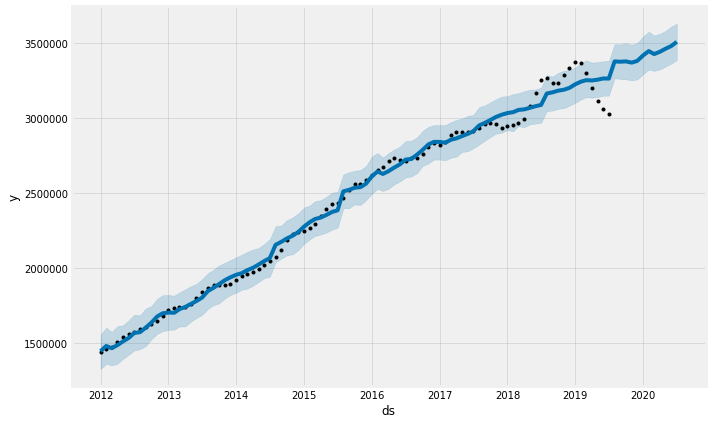

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


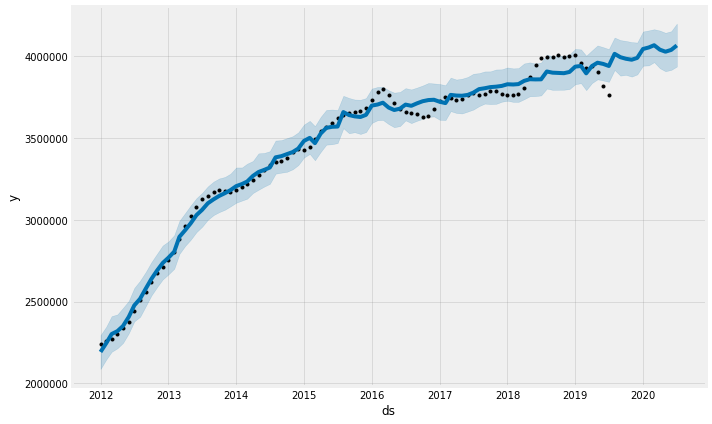

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


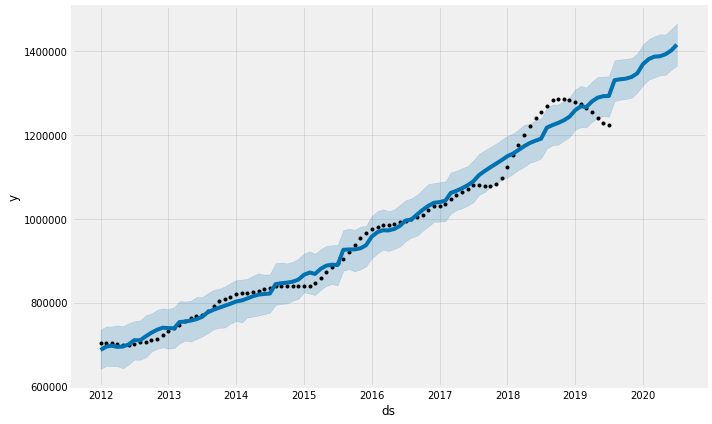

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


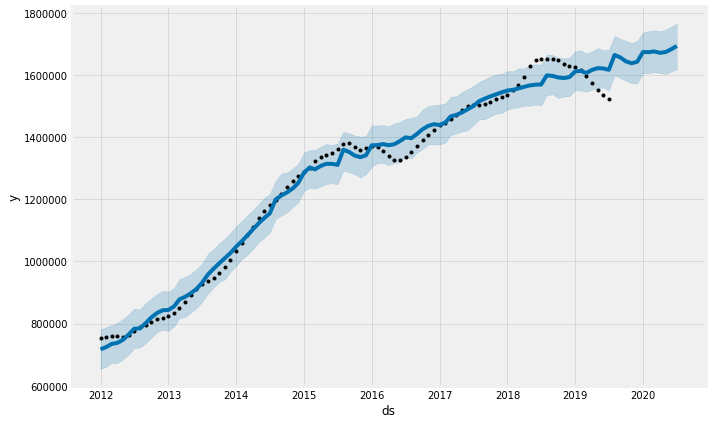

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


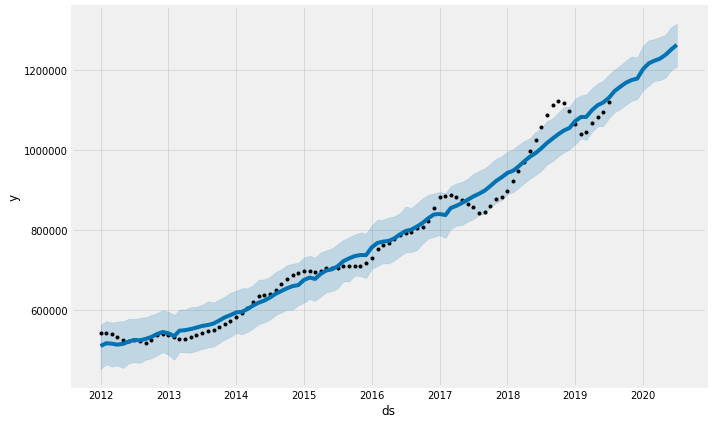

In [15]:
prophet_graph(ts_33139)
prophet_graph(ts_94109)
prophet_graph(ts_11230)
prophet_graph(ts_94110)
prophet_graph(ts_11226)

In [23]:
!ls

LICENSE                            prediction_home_2020_7.csv
README.md                          prophet_model.ipynb
Zip_Zhvi_SingleFamilyResidence.csv text.py
prediction_home.csv


In [24]:
yearly_prediction = pd.read_csv('prediction_home.csv')
yearly_prediction.head()

,Unnamed: 0,current_price,ds,y_hat,y_hat_lower,y_hat_upper,zip,diff
0,0,1056500.0,2019-08-01,1.081444e+06,1.070803e+06,1.091900e+06,60657,24944.166611
1,1,330100.0,2019-08-01,3.408095e+05,3.356942e+05,3.459544e+05,77494,10709.460297
2,2,1323500.0,2019-08-01,1.347073e+06,1.337165e+06,1.356200e+06,60614,23573.127095
3,3,184300.0,2019-08-01,1.853527e+05,1.844869e+05,1.861864e+05,77449,1052.723317
4,4,129800.0,2019-08-01,1.313705e+05,1.305053e+05,1.321753e+05,79936,1570.537875


In [54]:
yearly_prediction1 = yearly_prediction.groupby('zip').mean()

In [55]:
yearly_prediction1.head()

,Unnamed: 0,current_price,y_hat,y_hat_lower,y_hat_upper,diff
zip,,,,,,
2169,86,480600.0,4.944409e+05,4.886069e+05,5.003176e+05,13840.943256
6010,113,196500.0,1.956266e+05,1.941212e+05,1.970319e+05,-873.385157
7030,55,1758800.0,1.739082e+06,1.709908e+06,1.767411e+06,-19718.212575
8701,70,422400.0,4.188446e+05,4.155978e+05,4.219789e+05,-3555.418120
10011,23,9409000.0,9.510136e+06,9.195908e+06,9.819696e+06,101135.558215


In [72]:
yearly_prediction1['zip'] = yearly_prediction1.index
yearly_prediction1

,Unnamed: 0,current_price,y_hat,y_hat_lower,y_hat_upper,diff,zip
zip,,,,,,,
2169,86,480600.0,4.944409e+05,4.886069e+05,5.003176e+05,13840.943256,2169
6010,113,196500.0,1.956266e+05,1.941212e+05,1.970319e+05,-873.385157,6010
7030,55,1758800.0,1.739082e+06,1.709908e+06,1.767411e+06,-19718.212575,7030
8701,70,422400.0,4.188446e+05,4.155978e+05,4.219789e+05,-3555.418120,8701
10011,23,9409000.0,9.510136e+06,9.195908e+06,9.819696e+06,101135.558215,10011
10128,24,6906400.0,7.100881e+06,6.253292e+06,8.060487e+06,194481.481213,10128
10314,98,558900.0,5.739530e+05,5.653211e+05,5.821875e+05,15053.005677,10314
10456,141,431000.0,4.529404e+05,4.403331e+05,4.657532e+05,21940.449747,10456
10462,39,501000.0,5.097930e+05,5.062528e+05,5.135891e+05,8793.040491,10462


In [40]:
# yearly_prediction['ds'] = pd.to_datetime(yearly_prediction['ds'])
# yearly_prediction1 = yearly_prediction.set_index('ds')

In [42]:
# yearly_prediction1['zip'] = yearly_prediction1.zip.astype(str)

In [61]:
new_df['mean'] = new_df.loc[:,'2018-07':'2019-07'].mean(skipna=True, axis=1)

In [63]:
new_df = new_df[['RegionName', 'mean']]
new_df.head()

,RegionName,mean
0,60657,1.059377e+06
1,77494,3.349538e+05
2,60614,1.331092e+06
3,77449,1.810615e+05
4,79936,1.274077e+05


In [71]:
new_df.rename(columns={'RegionName': 'zip'}, inplace=True)
new_df.head()

,zip,mean
0,60657,1.059377e+06
1,77494,3.349538e+05
2,60614,1.331092e+06
3,77449,1.810615e+05
4,79936,1.274077e+05


In [73]:
compare_mean = yearly_prediction1.merge(new_df, how='inner', on='zip')
compare_mean.head()

,Unnamed: 0,current_price,y_hat,y_hat_lower,y_hat_upper,diff,zip,mean
0,86,480600.0,4.944409e+05,4.886069e+05,5.003176e+05,13840.943256,2169,4.734615e+05
1,113,196500.0,1.956266e+05,1.941212e+05,1.970319e+05,-873.385157,6010,1.947615e+05
2,55,1758800.0,1.739082e+06,1.709908e+06,1.767411e+06,-19718.212575,7030,1.765769e+06
3,70,422400.0,4.188446e+05,4.155978e+05,4.219789e+05,-3555.418120,8701,4.173231e+05
4,23,9409000.0,9.510136e+06,9.195908e+06,9.819696e+06,101135.558215,10011,1.032025e+07
5,24,6906400.0,7.100881e+06,6.253292e+06,8.060487e+06,194481.481213,10128,6.913069e+06
6,98,558900.0,5.739530e+05,5.653211e+05,5.821875e+05,15053.005677,10314,5.614692e+05
7,141,431000.0,4.529404e+05,4.403331e+05,4.657532e+05,21940.449747,10456,4.295385e+05
8,39,501000.0,5.097930e+05,5.062528e+05,5.135891e+05,8793.040491,10462,4.873538e+05
9,45,797000.0,8.188083e+05,7.981434e+05,8.392960e+05,21808.279649,10463,7.739923e+05


In [92]:
compare_mean['year_diff'] = compare_mean['y_hat'] / compare_mean['mean']
compare_mean.sort_values(by='year_diff', ascending=False).head(10)

,Unnamed: 0,current_price,y_hat,y_hat_lower,y_hat_upper,diff,zip,mean,year_diff
119,116,236300.0,2.532019e+05,2.484117e+05,2.578864e+05,16901.938237,89108,2.330615e+05,1.086417
59,90,105700.0,1.078394e+05,1.065082e+05,1.091189e+05,2139.440525,44035,1.013385e+05,1.064151
62,123,108100.0,1.101181e+05,1.091539e+05,1.109824e+05,2018.122889,48180,1.038308e+05,1.060554
77,34,227500.0,2.315044e+05,2.302222e+05,2.327353e+05,4004.379224,75052,2.184462e+05,1.059778
105,58,622400.0,6.387499e+05,6.348840e+05,6.426284e+05,16349.922641,78704,6.031000e+05,1.059111
9,45,797000.0,8.188083e+05,7.981434e+05,8.392960e+05,21808.279649,10463,7.739923e+05,1.057902
18,7,1119800.0,1.147806e+06,1.091160e+06,1.205112e+06,28006.198454,11226,1.085692e+06,1.057211
82,129,227200.0,2.337331e+05,2.320068e+05,2.354817e+05,6533.066020,76028,2.211154e+05,1.057064
53,11,231900.0,2.398474e+05,2.373439e+05,2.422885e+05,7947.444519,37013,2.272308e+05,1.055524
7,141,431000.0,4.529404e+05,4.403331e+05,4.657532e+05,21940.449747,10456,4.295385e+05,1.054482


In [83]:
ts_89108 = df.loc[df['RegionName'] == 89108]
ts_44035 = df.loc[df['RegionName'] == 44035]
ts_48180 = df.loc[df['RegionName'] == 48180]
ts_75052 = df.loc[df['RegionName'] == 75052]
ts_78704 = df.loc[df['RegionName'] == 78704]

In [84]:
ts_89108 = ts_89108[['Date', 'Value']]  
ts_44035 = ts_44035[['Date', 'Value']]
ts_48180 = ts_48180[['Date', 'Value']]
ts_75052 = ts_75052[['Date', 'Value']]
ts_78704 = ts_78704[['Date', 'Value']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


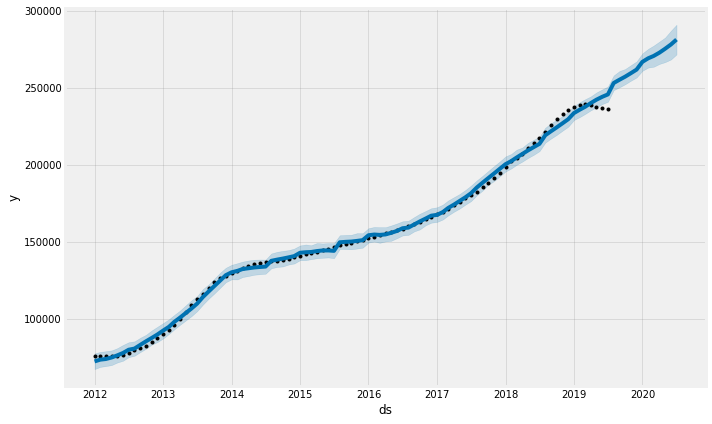

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


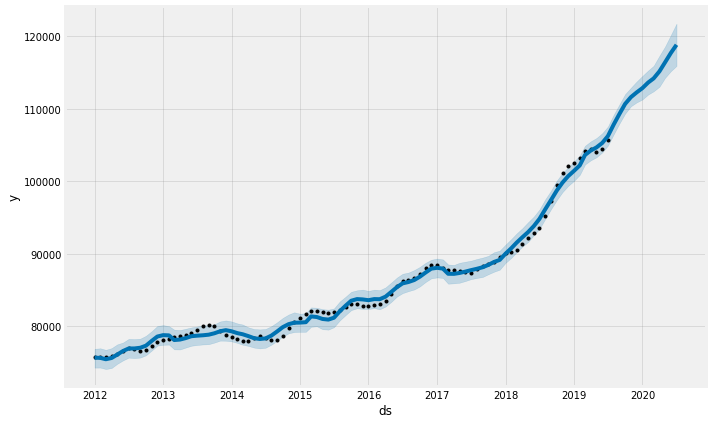

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


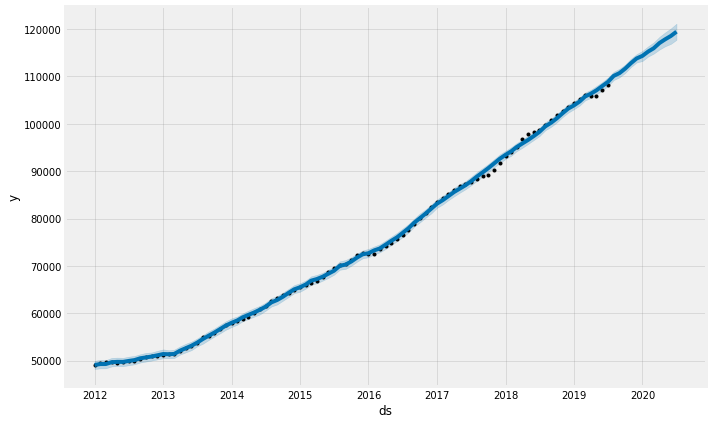

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


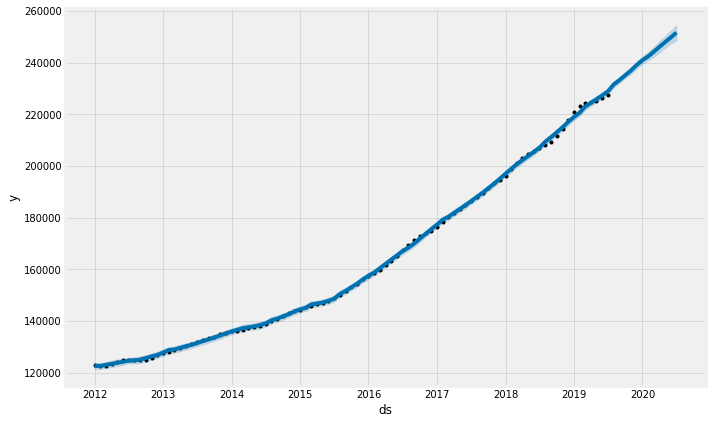

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


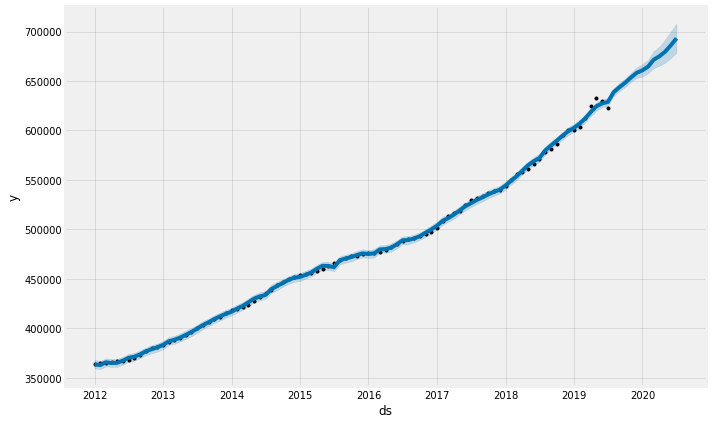

In [85]:
prophet_graph(ts_89108)
prophet_graph(ts_44035)
prophet_graph(ts_48180)
prophet_graph(ts_75052)
prophet_graph(ts_78704)

In [ ]:
def prophet_graph(df):
    df = df.rename(columns={'Date': 'ds',
                        'Value': 'y'})
    Model = proph(interval_width=0.95)
    Model.fit(df)
    future_dates = Model.make_future_dataframe(periods=12, freq='MS')
    forecast = Model.predict(future_dates)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    Model.plot(forecast, uncertainty=True)
    return plt.show()

In [104]:
cv_89108 = ts_89108.rename(columns={'Date': 'ds',
                        'Value': 'y'})
m = proph()
m.fit(cv_89108)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [105]:
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
98,2020-03-01,270739.227248,266586.980754,274835.624713
99,2020-04-01,272900.867477,268442.032631,277191.918140
100,2020-05-01,275402.857245,270567.187526,280240.340127
101,2020-06-01,278160.858664,273065.925111,283574.448793
102,2020-07-01,281384.229877,275074.092586,287600.299107


In [129]:
forecast.shape

(103, 16)

In [112]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2014-01-23 00:00:00 and 2018-07-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-02-01,131940.090053,131705.389694,132190.643667,131300.0,2014-01-23
1,2014-03-01,133914.762406,133106.673195,134673.221530,133000.0,2014-01-23
2,2014-04-01,137280.813785,135819.372191,138833.514763,134700.0,2014-01-23
3,2014-05-01,142121.786984,139789.351405,144638.548155,135700.0,2014-01-23
4,2014-06-01,146814.776814,143479.119679,150439.863005,136500.0,2014-01-23


In [114]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,41 days,4.578185e+06,2139.669266,1535.899898,0.009052,0.083333
1,42 days,4.640544e+06,2154.192167,1572.235453,0.009274,0.166667
2,46 days,4.735105e+06,2176.029707,1614.217318,0.009517,0.166667
3,48 days,4.683556e+06,2164.152497,1552.756205,0.009081,0.250000
4,52 days,4.743603e+06,2177.981385,1591.831675,0.009297,0.250000


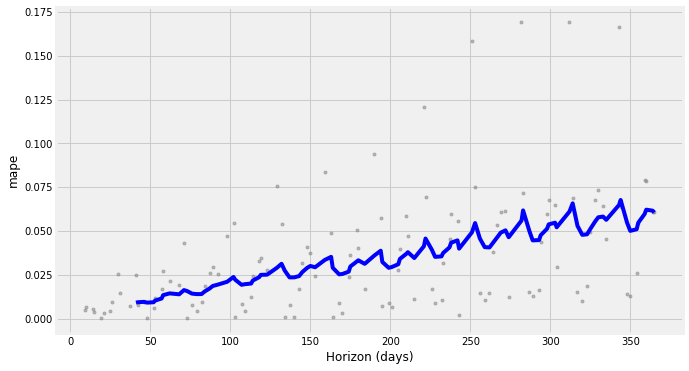

In [115]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

In [121]:
df.shape

(1290042, 8)

In [119]:
df_topone.shape

(12880, 8)

In [130]:
cv_44035 = ts_44035.rename(columns={'Date': 'ds',
                        'Value': 'y'})
m = proph()
m.fit(cv_44035)

future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
98,2020-03-01,114204.076751,113032.084840,115328.006902
99,2020-04-01,115178.135475,113903.508935,116274.351500
100,2020-05-01,116422.893220,115027.528756,117693.257990
101,2020-06-01,117720.774152,116127.594536,119144.549725
102,2020-07-01,118842.969698,117203.755563,120432.603597


In [131]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2014-01-23 00:00:00 and 2018-07-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-02-01,78782.862551,78673.538587,78905.972986,78300.0,2014-01-23
1,2014-03-01,80015.645567,79648.786558,80416.220220,78000.0,2014-01-23
2,2014-04-01,79377.284248,78636.672788,80144.953113,77900.0,2014-01-23
3,2014-05-01,78714.104883,77575.589047,79930.122069,78400.0,2014-01-23
4,2014-06-01,78060.021364,76438.587526,79847.296075,78600.0,2014-01-23


In [133]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,41 days,1.740645e+06,1319.335067,972.007518,0.011311,0.166667
1,42 days,1.721564e+06,1312.084009,937.162760,0.010862,0.250000
2,46 days,1.698125e+06,1303.121196,921.170385,0.010620,0.250000
3,48 days,1.696905e+06,1302.653029,918.903548,0.010588,0.333333
4,52 days,1.735477e+06,1317.375104,965.329320,0.011116,0.250000


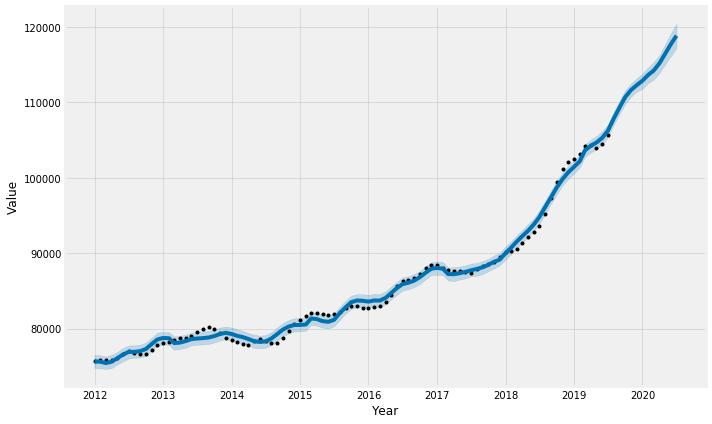

In [139]:
fig1 = m.plot(forecast, xlabel='Year', ylabel='Value')

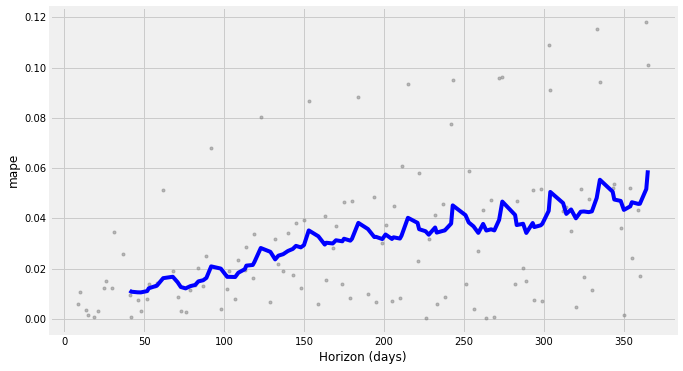

In [132]:
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

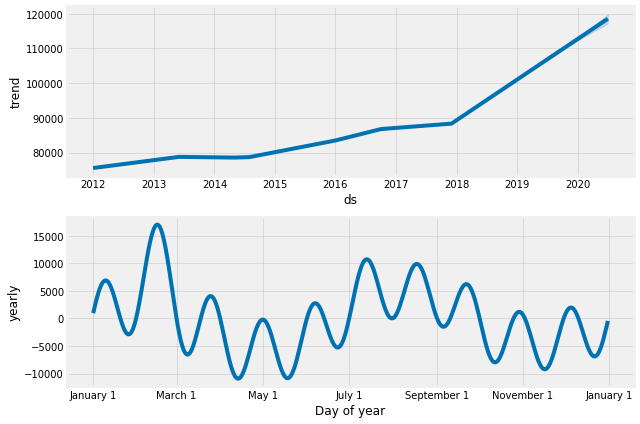

In [136]:
fig2 = m.plot_components(forecast)

In [ ]:
def prophet_cv(df):   
    Model = proph(interval_width=0.95) 
    Model.fit(df)
    future_dates = Model.make_future_dataframe(periods=12, freq='MS')
    forecast = Model.predict(future_dates)
    
